In [13]:
%pylab inline
import pickle, os
import condor, spimage, h5py
import scipy.ndimage as ndimage
import spimage
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = '/Users/benedikt/data/LCLS/amol3416/phasing/'
filename_tbsv_singles = data_path + 'tbsv_phased_single_%d.h5'
filename_tbsv_doubles = data_path + 'tbsv_phased_double_%d.h5'
filename_cbx_singles = data_path + 'cbx_phased_single_%d.h5'

In [9]:
# Configuration (Experiment)
distance = 259e-3 #[m]
pixelsize = 75e-6 #[m]
wavelength = 1.54e-9 #[m]
downsampling = 8

In [10]:
# Convert index to q (in nm)
x_to_q = lambda x, d: (2*np.sin(np.arctan2(x*pixelsize*downsampling, d)/2.)) / wavelength / 1e9

In [6]:
# TBSV
tbsv_singles = [0,1]
tbsv_doubles = [0,1]
prtf_tbsv = []
for i in tbsv_singles:
    with h5py.File(filename_tbsv_singles %i, 'r') as f:
        prtf_tbsv.append(f['prtf'][:])
for i in tbsv_doubles:
    with h5py.File(filename_tbsv_doubles %i, 'r') as f:
        prtf_tbsv.append(f['prtf'][:])
prtf_tbsv = np.array(prtf_tbsv)

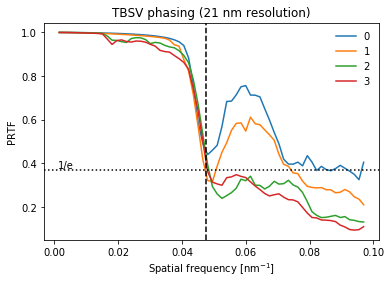

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(4):
    # Radial average of PRTF
    nx, ny = prtf_tbsv[i].shape[1], prtf_tbsv[i].shape[0]
    xx,yy = np.meshgrid(np.arange(nx),np.arange(ny))
    mask_radial = np.sqrt((xx-nx/2)**2 + (yy-ny/2)**2) < nx/2
    prtf_centers, prtf_radial = spimage.radialMeanImage(prtf_tbsv[i], msk=mask_radial, output_r=True)
    prtf_qr = x_to_q(prtf_centers, distance)
    limit_qr = prtf_qr[np.abs(ndimage.gaussian_filter1d(prtf_radial,2) - (1/np.e)).argmin()]
    ax.plot(prtf_qr, prtf_radial, label='%d' %i)
ax.legend(frameon=False)
ax.axhline(1/np.e, ls=':', color='k')
ax.axvline(1/21., color='k', ls='--')
ax.text(0.001, 1/np.e, '1/e', va='bottom')

ax.set_xlabel(r'Spatial frequency [nm$^{-1}$]')
ax.set_ylabel('PRTF')
ax.set_title('TBSV phasing (21 nm resolution)')
plt.show()

In [32]:
# Configuration (Experiment)
distance = 370e-3 #[m]
pixelsize = 75e-6 #[m]
wavelength = 1.54e-9 #[m]
downsampling = 8

In [33]:
# CBX
cbx_singles = [0,1,8,4,7]
prtf_cbx =[]
for i in cbx_singles:
    with h5py.File(filename_cbx_singles %i, 'r') as f:
        prtf_cbx.append(f['prtf'][:])
prtf_cbx = np.array(prtf_cbx)

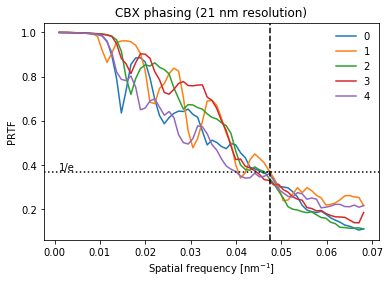

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(5):
    # Radial average of PRTF
    nx, ny = prtf_cbx[i].shape[1], prtf_cbx[i].shape[0]
    xx,yy = np.meshgrid(np.arange(nx),np.arange(ny))
    mask_radial = np.sqrt((xx-nx/2)**2 + (yy-ny/2)**2) < nx/2
    prtf_centers, prtf_radial = spimage.radialMeanImage(prtf_cbx[i], msk=mask_radial, output_r=True)
    prtf_qr = x_to_q(prtf_centers, distance)
    limit_qr = prtf_qr[np.abs(ndimage.gaussian_filter1d(prtf_radial,2) - (1/np.e)).argmin()]
    ax.plot(prtf_qr, prtf_radial, label='%d' %i)
ax.legend(frameon=False)
ax.axhline(1/np.e, ls=':', color='k')
ax.axvline(1/21., color='k', ls='--')
ax.text(0.001, 1/np.e, '1/e', va='bottom')

ax.set_xlabel(r'Spatial frequency [nm$^{-1}$]')
ax.set_ylabel('PRTF')
ax.set_title('CBX phasing (21 nm resolution)')
plt.show()